# SNR tapering given by antenna pattern
a slightly modified version of swath trade off script

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import cm

from swath_optimization_functions import RangeOptimizationProblem, core_SNR, theor_core_SNR
from geometryRadar import RadarGeometry
from farField import UniformAperture
from flat_earth_removal_functions import rgf2rgs_incidence
import numpy as np


In [2]:

# %% problem model
# antenna
la = 2
wa = .3
f = 10e9
antenna = UniformAperture(la, wa, frequency=f)
# wavelength
c = 299792458.0
wavel = c / f
# create a radar geometry
radGeo = RadarGeometry()
#   looking angle deg
side_looking_angle = 30  # degrees #todo consider here the spherical earth incidence angle
radGeo.set_rotation(side_looking_angle / 180 * np.pi, 0, 0)
#   altitude
altitude = 500e3  # m
radGeo.set_initial_position(0, 0, altitude)
#   speed
radGeo.set_speed(radGeo.orbital_speed())
# problem creation
opti = RangeOptimizationProblem(radGeo, antenna, wavel)
# %% boundaries
# nominal swath
rmin = altitude * np.tan(side_looking_angle / 180 * np.pi - wavel / wa / 2)
rmax = altitude * np.tan(side_looking_angle / 180 * np.pi + wavel / wa / 2)
ground_range_axis = np.linspace(rmin, rmax, 200)
ground_range_axis_sphere = rgf2rgs_incidence(ground_range_axis, altitude)
snr_core = core_SNR(radGeo, antenna, -ground_range_axis, wavel)



235447.71915473888
235447.71915473888
235750.2018566581
236052.6631079429
236355.10288392336
236657.5211599408
236959.91791134884
237262.2931135146
237564.64674181648
237866.9787716465
238169.2891784065
238471.57793751368
238773.84502439652
239076.09041449518
239378.31408326325
239680.51600616632
239982.6961586829
240284.8545163029
240586.99105453026
240889.1057488802
241191.19857488057
241493.2695080723
241795.31852400885
242097.3455982551
242399.3507063899
242701.33382400332
243003.2949266997
243305.2339900944
243607.15098981606
243909.0459015054
244210.91870081637
244512.7693634155
244814.59786498174
245116.40418120648
245418.1882877942
245719.95016046168
246021.68977493804
246323.40710696633
246625.10213230137
246926.77482671052
247228.42516597427
247530.05312588587
247831.6586822509
248133.2418108879
248434.80248762842
248736.34068831688
249037.8563888093
249339.34956497577
249640.82019269938
249942.2682478741
250243.69370640916
250545.0965442248
250846.47673725506
251147.83426144

 20%|██        | 1/5 [00:00<00:00,  8.20it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263016.79639667145
-263016.79639667145
-263036.84125380305
-263036.84125380305
-263036.648905107
-263036.648905107
-263036.64889265737
-263036.64889265737
-263036.64889267634
-263036.64889267634
-263036.6488926626
-263036.6488926626
-263036.6488926225
-263036.6488926225
-263036.64889263967
-263036.64889263967
-263036.6488926291
-263036.6488926291
-263036.6488926291
-263036.6488926291
258036.64889262908
258036.64889262908
268036.64889262913
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263105.311549121
-263105.311549121
-263120.68721892
-263120.68721892
-263120.5673436159
-263120.5673436159
-263120.56733865617
-263120.56733865617
-263120.56733865436
-263120.56733865436
-263120.56733865436
-263120.56733865436
253120.56733865442
253120.56733865442
273120.5673386542
-264662.6969265597
-264662.6969265597


 60%|██████    | 3/5 [00:00<00:00, 10.26it/s]

-264483.5866586156
-264483.5866586156
-263251.92567859986
-263251.92567859986
-263261.07506096404
-263261.07506096404
-263261.0286425361
-263261.0286425361
-263261.02864179556
-263261.02864179556
-263261.02864179434
-263261.02864179434
-263261.02864179434
-263261.02864179434
248261.0286417943
248261.0286417943
278261.0286417944
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263455.7442673482
-263455.7442673482
-263458.99499755964
-263458.99499755964
-263458.98891755444
-263458.98891755444
-263458.9889175467
-263458.9889175467
-263458.9889175467
-263458.9889175467
243458.9889175465
243458.9889175465
283458.9889175466
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263716.4570805808
-263716.4570805808
-263715.9199969913
-263715.9199969913
-263715.91938883805
-263715.91938883805
-263715.91938883706
-263715.91938883706
-263715.91938883706
-263715.91938883706


100%|██████████| 5/5 [00:00<00:00, 11.15it/s]


238715.9193888368
238715.9193888368
288715.91938883706


  0%|          | 0/80 [00:00<?, ?it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-262994.5942621577
-262994.5942621577
-263015.9248557236
-263015.9248557236
-263015.71017122956
-263015.71017122956
-263015.7101558322
-263015.7101558322
-263015.71015571523
-263015.71015571523
-263015.7101557417
-263015.7101557417
-263015.71015571035
-263015.71015571035
-263015.7101555621
-263015.7101555621
-263015.7101566135
-263015.7101566135
-263015.71015576285
-263015.71015576285
-263015.7101559559
-263015.7101559559
-263015.71015588177
-263015.71015588177
-263015.7101558685
-263015.7101558685
-263015.710155709
-263015.710155709
-263015.7101558486
-263015.7101558486
-263015.7101557754
-263015.7101557754


  1%|▏         | 1/80 [00:00<00:16,  4.65it/s]

-263015.7101557628
-263015.7101557628
-263015.7101557628
-263015.7101557628
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-262997.2319613773
-262997.2319613773
-263018.40733717027
-263018.40733717027
-263018.195401641
-263018.195401641
-263018.1953866603
-263018.1953866603
-263018.19538665377
-263018.19538665377
-263018.19538665377
-263018.19538665377
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263000.27016832086
-263000.27016832086
-263021.2675868199
-263021.2675868199
-263021.0587853297
-263021.0587853297
-263021.05877069413
-263021.05877069413
-263021.0587706188
-263021.0587706188
-263021.05877063697
-263021.05877063697
-263021.0587706134
-263021.0587706134
-263021.0587706149
-263021.0587706149
-263021.0587706149
-263021.0587706149


  5%|▌         | 4/80 [00:00<00:09,  7.99it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263003.70865621365
-263003.70865621365
-263024.50573824585
-263024.50573824585
-263024.30044220045
-263024.30044220045
-263024.30042813875
-263024.30042813875
-263024.3004280467
-263024.3004280467
-263024.3004280907
-263024.3004280907
-263024.30042808346
-263024.30042808346
-263024.30042808346
-263024.30042808346
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263007.54716970806
-263007.54716970806
-263028.1219425577
-263028.1219425577
-263027.92050846043
-263027.92050846043
-263027.92049486306
-263027.92049486306
-263027.9204948764
-263027.9204948764
-263027.9204948764
-263027.9204948764
-264662.6969265597
-264662.6969265597


  8%|▊         | 6/80 [00:00<00:08,  8.83it/s]

-264483.5866586156
-264483.5866586156
-263011.7854266511
-263011.7854266511
-263032.11636858876
-263032.11636858876
-263031.9191358964
-263031.9191358964
-263031.9191228959
-263031.9191228959
-263031.9191228423
-263031.9191228423
-263031.91912287456
-263031.91912287456
-263031.91912286263
-263031.91912286263
-263031.91912286263
-263031.91912286263
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263016.4231168593
-263016.4231168593
-263036.48920255416
-263036.48920255416
-263036.296493163
-263036.296493163
-263036.29648063856
-263036.29648063856
-263036.2964806132
-263036.2964806132
-263036.29648090655
-263036.29648090655


  9%|▉         | 7/80 [00:00<00:08,  8.46it/s]

-263036.29648058297
-263036.29648058297
-263036.29648059566
-263036.29648059566
-263036.29648059566
-263036.29648059566
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263021.45990369667
-263021.45990369667
-263041.24064863933
-263041.24064863933
-263041.05276463326
-263041.05276463326
-263041.0527526849
-263041.0527526849
-263041.05275267217
-263041.05275267217
-263041.05275267217
-263041.05275267217
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263026.89542790054
-263026.89542790054
-263046.3709285502
-263046.3709285502
-263046.18815154315
-263046.18815154315
-263046.18814021855
-263046.18814021855
-263046.1881402631
-263046.1881402631


 11%|█▏        | 9/80 [00:01<00:07,  9.08it/s]

-263046.1881402666
-263046.1881402666
-263046.1881402666
-263046.1881402666
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263032.72930657765
-263032.72930657765
-263051.88028177095
-263051.88028177095
-263051.7028716014
-263051.7028716014
-263051.7028609616
-263051.7028609616
-263051.70286097145
-263051.70286097145
-263051.70286097145
-263051.70286097145
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263038.9611328394
-263038.9611328394
-263057.7689654505
-263057.7689654505
-263057.59715919656
-263057.59715919656
-263057.5971491884
-263057.5971491884
-263057.5971491877
-263057.5971491877
-263057.5971491877
-263057.5971491877


 16%|█▋        | 13/80 [00:01<00:06, 10.08it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263045.59047905833
-263045.59047905833
-263064.0372544378
-263064.0372544378
-263063.871265579
-263063.871265579
-263063.8712562195
-263063.8712562195
-263063.871256209
-263063.871256209
-263063.871256209
-263063.871256209
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263052.6168984865
-263052.6168984865
-263070.6854414129
-263070.6854414129
-263070.5254590562
-263070.5254590562
-263070.52545033564
-263070.52545033564
-263070.525450338
-263070.525450338
-263070.525450338
-263070.525450338


 19%|█▉        | 15/80 [00:01<00:06, 10.43it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263060.0399250406
-263060.0399250406
-263077.7138368902
-263077.7138368902
-263077.56002508244
-263077.56002508244
-263077.56001699687
-263077.56001699687
-263077.5600170051
-263077.5600170051
-263077.5600170051
-263077.5600170051
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263067.8590757819
-263067.8590757819
-263085.1227692032
-263085.1227692032
-263084.9752664934
-263084.9752664934
-263084.97525904665
-263084.97525904665
-263084.97525903705
-263084.97525903705
-263084.97525903705
-263084.97525903705


 21%|██▏       | 17/80 [00:01<00:06, 10.45it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263076.0738521868
-263076.0738521868
-263092.9125846546
-263092.9125846546
-263092.7715037099
-263092.7715037099
-263092.77149687224
-263092.77149687224
-263092.77149688767
-263092.77149688767
-263092.77149688103
-263092.77149688103
-263092.77149688103
-263092.77149688103
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263084.6837419594
-263084.6837419594
-263101.08364752564
-263101.08364752564
-263100.94907488587
-263100.94907488587
-263100.9490686614
-263100.9490686614
-263100.94906866277
-263100.94906866277
-263100.94906866277
-263100.94906866277


 24%|██▍       | 19/80 [00:01<00:05, 10.61it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263093.6882208542
-263093.6882208542
-263109.6363401701
-263109.6363401701
-263109.5083361735
-263109.5083361735
-263109.50833053916
-263109.50833053916
-263109.50833053555
-263109.50833053555
-263109.50833053555
-263109.50833053555
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263103.0867536864
-263103.0867536864
-263118.5710631064
-263118.5710631064
-263118.4496619594
-263118.4496619594
-263118.4496568715
-263118.4496568715
-263118.4496568689
-263118.4496568689
-263118.4496568689
-263118.4496568689


 26%|██▋       | 21/80 [00:02<00:05, 10.73it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263112.8787975631
-263112.8787975631
-263127.88823513396
-263127.88823513396
-263127.7734450655
-263127.7734450655
-263127.7734405006
-263127.7734405006
-263127.77344049956
-263127.77344049956
-263127.77344049956
-263127.77344049956
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263123.06380246347
-263123.06380246347
-263137.58829341363
-263137.58829341363
-263137.48009701894
-263137.48009701894
-263137.4800929608
-263137.4800929608
-263137.48009296
-263137.48009296
-263137.48009296
-263137.48009296
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263133.6412141953
-263133.6412141953
-263147.6716936199
-263147.6716936199


 29%|██▉       | 23/80 [00:02<00:05, 10.57it/s]

-263147.57004835183
-263147.57004835183
-263147.5700447686
-263147.5700447686
-263147.5700447679
-263147.5700447679
-263147.5700447679
-263147.5700447679
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263144.6104763408
-263144.6104763408
-263158.1389100863
-263158.1389100863
-263158.0437488452
-263158.0437488452
-263158.04374569806
-263158.04374569806
-263158.04374569864
-263158.04374569864
-263158.04374569864
-263158.04374569864
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263155.9710319457
-263155.9710319457
-263168.9904359616
-263168.9904359616


 31%|███▏      | 25/80 [00:02<00:05, 10.36it/s]

-263168.9016678377
-263168.9016678377
-263168.9016650999
-263168.9016650999
-263168.9016650981
-263168.9016650981
-263168.9016650981
-263168.9016650981
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263167.7223267687
-263167.7223267687
-263180.22678341763
-263180.22678341763
-263180.1442945599
-263180.1442945599
-263180.1442921953
-263180.1442921953
-263180.14429219457
-263180.14429219457
-263180.14429219457
-263180.14429219457
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263179.8638106155
-263179.8638106155
-263191.8484837804
-263191.8484837804


 34%|███▍      | 27/80 [00:02<00:05, 10.27it/s]

-263191.7721384313
-263191.7721384313
-263191.7721364007
-263191.7721364007
-263191.7721363984
-263191.7721363984
-263191.7721363984
-263191.7721363984
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263192.3949406162
-263192.3949406162
-263203.85608782683
-263203.85608782683
-263203.7857294033
-263203.7857294033
-263203.78572768066
-263203.78572768066
-263203.7857276808
-263203.7857276808
-263203.7857276808
-263203.7857276808
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263205.31518329674
-263205.31518329674
-263216.25016598974
-263216.25016598974
-263216.18561833847
-263216.18561833847


 36%|███▋      | 29/80 [00:02<00:05, 10.08it/s]

-263216.18561689084
-263216.18561689084
-263216.18561689276
-263216.18561689276
-263216.18561689276
-263216.18561689276
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263218.6240173279
-263218.6240173279
-263229.0313086251
-263229.0313086251
-263228.97237738525
-263228.97237738525
-263228.97237617895
-263228.97237617895
-263228.97237617616
-263228.97237617616
-263228.97237617616
-263228.97237617616
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263232.32093622163
-263232.32093622163
-263242.2001263056
-263242.2001263056
-263242.14660032286
-263242.14660032286
-263242.1465993314
-263242.1465993314


 39%|███▉      | 31/80 [00:03<00:04,  9.91it/s]

-263242.1465993306
-263242.1465993306
-263242.1465993306
-263242.1465993306
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263246.40545121237
-263246.40545121237
-263255.7572501336
-263255.7572501336
-263255.70890303917
-263255.70890303917
-263255.7089022335
-263255.7089022335
-263255.708902233
-263255.708902233
-263255.708902233
-263255.708902233
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263260.877093947
-263260.877093947
-263269.7033320822
-263269.7033320822
-263269.6599239045
-263269.6599239045
-263269.65992325585
-263269.65992325585
-263269.6599232592
-263269.6599232592
-263269.6599232592
-263269.6599232592


 41%|████▏     | 33/80 [00:03<00:04,  9.77it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263275.73541957396
-263275.73541957396
-263284.0390453704
-263284.0390453704
-263284.0003242361
-263284.0003242361
-263284.00032372563
-263284.00032372563
-263284.0003237266
-263284.0003237266
-263284.0003237266
-263284.0003237266
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263290.9800096558
-263290.9800096558
-263298.76508485264
-263298.76508485264
-263298.73078876734
-263298.73078876734
-263298.7307883725
-263298.7307883725
-263298.73078837345
-263298.73078837345
-263298.73078837345
-263298.73078837345


 44%|████▍     | 35/80 [00:03<00:04,  9.71it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263306.6104755406
-263306.6104755406
-263313.882167449
-263313.882167449
-263313.852026123
-263313.852026123
-263313.8520258223
-263313.8520258223
-263313.852025825
-263313.852025825
-263313.852025825
-263313.852025825
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263322.6264612759
-263322.6264612759
-263329.3910326237
-263329.3910326237
-263329.36476932676
-263329.36476932676
-263329.36476910074
-263329.36476910074
-263329.36476910126
-263329.36476910126
-263329.36476910126
-263329.36476910126
-264662.6969265597
-264662.6969265597


 46%|████▋     | 37/80 [00:03<00:04,  9.83it/s]

-264483.5866586156
-264483.5866586156
-263339.02764716814
-263339.02764716814
-263345.29244286526
-263345.29244286526
-263345.26977632206
-263345.26977632206
-263345.26977615745
-263345.26977615745
-263345.26977615745
-263345.26977615745
-263345.26977615745
-263345.26977615745
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263355.8137530177
-263355.8137530177
-263361.58718421304
-263361.58718421304
-263361.5678305339
-263361.5678305339
-263361.56783041806
-263361.56783041806
-263361.5678304187
-263361.5678304187
-263361.5678304187
-263361.5678304187


 49%|████▉     | 39/80 [00:04<00:04,  9.68it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263372.9845417594
-263372.9845417594
-263378.2760668364
-263378.2760668364
-263378.2597414293
-263378.2597414293
-263378.25974135107
-263378.25974135107
-263378.25974135
-263378.25974135
-263378.25974135
-263378.25974135
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263390.5398228781
-263390.5398228781
-263395.35992562765
-263395.35992562765
-263395.34634511574
-263395.34634511574
-263395.3463450641
-263395.3463450641
-263395.34634506615
-263395.34634506615
-263395.34634506615
-263395.34634506615


 51%|█████▏    | 41/80 [00:04<00:04,  9.23it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263408.47945622005
-263408.47945622005
-263412.8396208545
-263412.8396208545
-263412.8285049557
-263412.8285049557
-263412.82850492466
-263412.82850492466
-263412.82850492455
-263412.82850492455
-263412.82850492455
-263412.82850492455
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263426.8033557951
-263426.8033557951
-263430.71603883576
-263430.71603883576
-263430.7071122211
-263430.7071122211
-263430.70711220155
-263430.70711220155
-263430.70711220213
-263430.70711220213
-263430.70711220213
-263430.70711220213


 55%|█████▌    | 44/80 [00:04<00:03,  9.91it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263445.5114935379
-263445.5114935379
-263448.9900926559
-263448.9900926559
-263448.9830867553
-263448.9830867553
-263448.9830867443
-263448.9830867443
-263448.9830867443
-263448.9830867443
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263464.60390343127
-263464.60390343127
-263467.66272294725
-263467.66272294725
-263467.65737767715
-263467.65737767715
-263467.65737767314
-263467.65737767314
-263467.65737767314
-263467.65737767314


 57%|█████▊    | 46/80 [00:04<00:03, 10.27it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263484.0806855184
-263484.0806855184
-263486.73489868763
-263486.73489868763
-263486.73096411204
-263486.73096411204
-263486.73096411
-263486.73096411
-263486.73096411
-263486.73096411
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263503.9420101741
-263503.9420101741
-263506.20761805354
-263506.20761805354
-263506.20485594
-263506.20485594
-263506.20485594
-263506.20485594
-263506.20485594
-263506.20485594


 60%|██████    | 48/80 [00:04<00:03, 10.32it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263524.18812233896
-263524.18812233896
-263526.0819093238
-263526.0819093238
-263526.080094597
-263526.080094597
-263526.08009459655
-263526.08009459655
-263526.08009459655
-263526.08009459655
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263544.8193460447
-263544.8193460447
-263546.3588318262
-263546.3588318262
-263546.3577538823
-263546.3577538823
-263546.35775388306
-263546.35775388306
-263546.35775388306
-263546.35775388306


 62%|██████▎   | 50/80 [00:05<00:02, 10.52it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263565.836088873
-263565.836088873
-263567.03947692056
-263567.03947692056
-263567.0389408266
-263567.0389408266
-263567.0389408267
-263567.0389408267
-263567.0389408267
-263567.0389408267
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263587.23884673126
-263587.23884673126
-263588.1249690545
-263588.1249690545
-263588.1247965723
-263588.1247965723
-263588.12479657354
-263588.12479657354
-263588.12479657354
-263588.12479657354


 65%|██████▌   | 52/80 [00:05<00:02, 10.68it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263609.0282085179
-263609.0282085179
-263609.61646684096
-263609.61646684096
-263609.61649730476
-263609.61649730476
-263609.6164973055
-263609.6164973055
-263609.6164973055
-263609.6164973055
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263631.2048611813
-263631.2048611813
-263631.5151642172
-263631.5151642172
-263631.5152552162
-263631.5152552162
-263631.5152552171
-263631.5152552171
-263631.5152552171
-263631.5152552171


 68%|██████▊   | 54/80 [00:05<00:02, 10.75it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263653.7695946363
-263653.7695946363
-263653.82229161996
-263653.82229161996
-263653.82231950545
-263653.82231950545
-263653.82231950754
-263653.82231950754
-263653.82231950754
-263653.82231950754
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263676.7233070157
-263676.7233070157
-263676.53911723976
-263676.53911723976
-263676.5389774348
-263676.5389774348
-263676.5389774358
-263676.5389774358
-263676.5389774358
-263676.5389774358
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263700.0670099921
-263700.0670099921


 70%|███████   | 56/80 [00:05<00:02, 10.65it/s]

-263699.66694831674
-263699.66694831674
-263699.6665554055
-263699.6665554055
-263699.66655540594
-263699.66655540594
-263699.66655540594
-263699.66655540594
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263723.8018342121
-263723.8018342121
-263723.2071324918
-263723.2071324918
-263723.2064201011
-263723.2064201011
-263723.2064201006
-263723.2064201006
-263723.2064201006
-263723.2064201006
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263747.9290348394
-263747.9290348394
-263747.16105920426
-263747.16105920426
-263747.15997966833
-263747.15997966833


 72%|███████▎  | 58/80 [00:05<00:02, 10.65it/s]

-263747.15997966717
-263747.15997966717
-263747.15997966717
-263747.15997966717
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263772.4499973632
-263772.4499973632
-263771.53016114875
-263771.53016114875
-263771.52868494554
-263771.52868494554
-263771.5286849428
-263771.5286849428
-263771.5286849428
-263771.5286849428
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263797.3662434078
-263797.3662434078
-263796.315915788
-263796.315915788
-263796.3140307472
-263796.3140307472
-263796.3140307419
-263796.3140307419
-263796.3140307419
-263796.3140307419


 75%|███████▌  | 60/80 [00:06<00:01, 10.58it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263822.6794367353
-263822.6794367353
-263821.51984691195
-263821.51984691195
-263821.51755719766
-263821.51755719766
-263821.5175571913
-263821.5175571913
-263821.5175571913
-263821.5175571913
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263848.3913894376
-263848.3913894376
-263847.1435262526
-263847.1435262526
-263847.14085113263
-263847.14085113263
-263847.1408511234
-263847.1408511234
-263847.1408511234
-263847.1408511234
-264662.6969265597
-264662.6969265597


 78%|███████▊  | 62/80 [00:06<00:01, 10.44it/s]

-264483.5866586156
-264483.5866586156
-263874.50406814413
-263874.50406814413
-263873.1885751477
-263873.1885751477
-263873.18554754223
-263873.18554754223
-263873.18554753053
-263873.18554753053
-263873.18554753053
-263873.18554753053
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263901.01960048825
-263901.01960048825
-263899.656666269
-263899.656666269
-263899.65333109006
-263899.65333109006
-263899.65333107545
-263899.65333107545
-263899.65333107585
-263899.65333107585
-263899.65333107585
-263899.65333107585
-264662.6969265597
-264662.6969265597


 80%|████████  | 64/80 [00:06<00:01, 10.07it/s]

-264483.5866586156
-264483.5866586156
-263927.94028158975
-263927.94028158975
-263926.5495253825
-263926.5495253825
-263926.5459376946
-263926.5459376946
-263926.545937678
-263926.545937678
-263926.54593767674
-263926.54593767674
-263926.54593767674
-263926.54593767674
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-263955.26858071826
-263955.26858071826
-263953.86893317115
-263953.86893317115
-263953.86515617155
-263953.86515617155
-263953.86515615246
-263953.86515615246
-263953.86515615194
-263953.86515615194
-263953.86515615194
-263953.86515615194
-264662.6969265597
-264662.6969265597


 82%|████████▎ | 66/80 [00:06<00:01,  9.59it/s]

-264483.5866586156
-264483.5866586156
-263983.00714803016
-263983.00714803016
-263981.6167271048
-263981.6167271048
-263981.61282995786
-263981.61282995786
-263981.6128299348
-263981.6128299348
-263981.61282993515
-263981.61282993515
-263981.61282993515
-263981.61282993515
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264011.15882136865
-264011.15882136865
-264009.79480335215
-264009.79480335215
-264009.7908589005
-264009.7908589005
-264009.7908588764
-264009.7908588764
-264009.79085887683
-264009.79085887683
-264009.79085887683
-264009.79085887683


 85%|████████▌ | 68/80 [00:06<00:01,  9.34it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264039.7266331761
-264039.7266331761
-264038.40511874185
-264038.40511874185
-264038.40120113397
-264038.40120113397
-264038.40120111033
-264038.40120111033
-264038.40120111045
-264038.40120111045
-264038.40120111045
-264038.40120111045
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264068.7138173808
-264068.7138173808
-264067.4496927651
-264067.4496927651
-264067.4458750323
-264067.4458750323
-264067.4458750075
-264067.4458750075
-264067.44587500877
-264067.44587500877
-264067.44587500877
-264067.44587500877


 88%|████████▊ | 70/80 [00:07<00:01,  9.13it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264098.1238163355
-264098.1238163355
-264096.93060961826
-264096.93060961826
-264096.9269612484
-264096.9269612484
-264096.9269612245
-264096.9269612245
-264096.92696122505
-264096.92696122505
-264096.92696122505
-264096.92696122505
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264127.9602876692
-264127.9602876692
-264126.8500202876
-264126.8500202876
-264126.84660484723
-264126.84660484723
-264126.84660482575
-264126.84660482575
-264126.84660482476
-264126.84660482476
-264126.84660482476
-264126.84660482476


 90%|█████████ | 72/80 [00:07<00:00,  8.88it/s]

-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264158.2271110913
-264158.2271110913
-264157.21014465997
-264157.21014465997
-264157.20701753336
-264157.20701753336
-264157.207017515
-264157.207017515
-264157.20701751433
-264157.20701751433
-264157.20701751433
-264157.20701751433
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264188.9283949882
-264188.9283949882
-264188.0132736753
-264188.0132736753
-264188.0104799813
-264188.0104799813
-264188.010479966
-264188.010479966


 92%|█████████▎| 74/80 [00:07<00:00,  8.75it/s]

-264188.0104799656
-264188.0104799656
-264188.0104799656
-264188.0104799656
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264220.06848283095
-264220.06848283095
-264219.2617715017
-264219.2617715017
-264219.25934426516
-264219.25934426516
-264219.2593442511
-264219.2593442511
-264219.2593442507
-264219.2593442507
-264219.2593442507
-264219.2593442507
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264251.6519592133
-264251.6519592133
-264250.9580777363
-264250.9580777363


 94%|█████████▍| 75/80 [00:07<00:00,  9.00it/s]

-264250.9560363993
-264250.9560363993
-264250.9560363888
-264250.9560363888
-264250.9560363888
-264250.9560363888
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264283.68365548184
-264283.68365548184
-264283.1047096308
-264283.1047096308
-264283.10305901093
-264283.10305901093
-264283.1030590032
-264283.1030590032
-264283.1030590032
-264283.1030590032
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264316.1686547429
-264316.1686547429
-264315.7042643278
-264315.7042643278
-264315.7029941117
-264315.7029941117


 96%|█████████▋| 77/80 [00:07<00:00,  9.62it/s]

-264315.7029941074
-264315.7029941074
-264315.7029941074
-264315.7029941074
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264349.11229615455
-264349.11229615455
-264348.75942112267
-264348.75942112267
-264348.7585060218
-264348.7585060218
-264348.7585060186
-264348.7585060186
-264348.7585060186
-264348.7585060186
-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264382.52017823176
-264382.52017823176
-264382.2729437232
-264382.2729437232
-264382.27234440943
-264382.27234440943
-264382.2723444081
-264382.2723444081
-264382.2723444081
-264382.2723444081


100%|██████████| 80/80 [00:08<00:00,  9.79it/s]


-264662.6969265597
-264662.6969265597
-264483.5866586156
-264483.5866586156
-264416.3981609596
-264416.3981609596
-264416.2476825304
-264416.2476825304
-264416.2473474948
-264416.2473474948
-264416.2473474944
-264416.2473474944
-264416.2473474944
-264416.2473474944


100%|██████████| 5/5 [00:00<00:00, 225.45it/s]


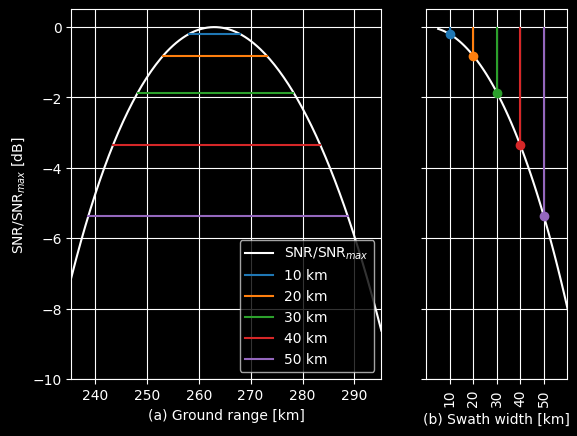

In [5]:

fig, [ax, ax1] = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [11, 5]})
plt.style.use('dark_background')
ax.plot(ground_range_axis_sphere / 1000, 10 * np.log10(snr_core/snr_core.max()), color='white', label='SNR/SNR$_{max}$')
ax.set_xlabel('(a) Ground range [km]')
ax.set_ylabel('SNR/SNR$_{max}$ [dB]')


core_ideal = theor_core_SNR(radGeo, antenna, -ground_range_axis, wavel)
#ax.plot(ground_range_axis_sphere / 1000, 10 * np.log10(core_ideal/snr_core.max()), '--g', label='C$_{ideal}$')
#ax.plot(ground_range_axis_sphere/1000, 10*np.log10(core_ideal) - 6, '--b')
# %% coarse swath sweep
swath = np.linspace(10, 50, 5) * 1e3
r_near = np.zeros_like(swath)
r_far = np.zeros_like(swath)
swath_center = np.zeros_like(swath)
core_c = np.zeros_like(swath)
for ii in tqdm(range(len(swath))):
    opti.swath = swath[ii]
    r_near[ii], r_far[ii], foo = opti.optimize(spherical=True)
    swath_center[ii] = (r_far[ii] + r_near[ii]) / 2
    r = np.array([r_near[ii], r_far[ii]])
    core = core_SNR(radGeo, antenna, r, wavel)
    core_c[ii] = core[0]
    ax.plot(rgf2rgs_incidence(-r, altitude) / 1000, 10 * np.log10(core/snr_core.max()), label=str(int(swath[ii] / 1000)) + str(' km'),
            color=cm.get_cmap('tab10').colors[ii])

swath_f = np.linspace(5, 70, 80) * 1e3
r_near_f = np.zeros_like(swath_f)
r_far_f = np.zeros_like(swath_f)
swath_center_f = np.zeros_like(swath_f)
core = np.zeros_like(swath_f)
for ii in tqdm(range(len(swath_f))):
    opti.swath = swath_f[ii]
    r_near_f[ii], r_far_f[ii], foo = opti.optimize(spherical=True)
    swath_center_f[ii] = (r_far_f[ii] + r_near_f[ii]) / 2
    r = np.array(r_far_f[ii])
    core[ii] = core_SNR(radGeo, antenna, r, wavel)
ax1.plot(swath_f / 1000, 10 * np.log10(core/snr_core.max()), color='white', label='C$_{min}$')
for ii in tqdm(range(len(swath))):
    (markers, stemlines, baseline) = ax1.stem(swath[ii] / 1000, 10 * np.log10(core_c[ii]/snr_core.max()),
                                              label=str(int(swath[ii] / 1000)) + str(' km'))
    plt.setp(stemlines, color=cm.get_cmap('tab10').colors[ii])
    plt.setp(markers, mfc=cm.get_cmap('tab10').colors[ii], mec=cm.get_cmap('tab10').colors[ii])

ax.grid()
ax1.grid()
ax1.set_xlabel('(b) Swath width [km]')

ax.set_xlim(ground_range_axis_sphere[0] / 1000, ground_range_axis_sphere[-1] / 1000)
ax.set_ylim(-10, .5)
ax1.set_xlim(0, 60)
ax1.set_xticks(swath / 1000, np.array(swath / 1000).astype('int'), rotation='vertical')
#fig.set_size_inches(3.47, 2)
#plt.subplots_adjust(left=0.11, bottom=.19, right=.98, top=1, wspace=.08)

ax.legend(loc='lower right')

plt.savefig('swathtradeoff.svg')

plt.show()